<div style="background-color:#783465 ; text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
<h1 style="color:white"> Data Analyse</h1>
    
<h4 style="color:black"> Datalab V: Julia Boschman, Isa Dijkstra, Daan Eising, Rogier Gernaat </h4>

<a name='start'></a>

## Table of contents

1. [H1: Inleiding](#1.0)
    - [&sect;1.1: Uitleg van het Notebook](#1.1)
    - [&sect;1.2: Imports](#1.2)
2. [H2: Inlezen van bestanden](#2.0)
    - [&sect;2.1: Verschillende scholen in bestand](#2.1)
    - [&sect;2.2: Inlezen van bestanden](#2.2)
    - [&sect;2.3: Display van de inhoud van de bestanden](#2.3)
3. [H3: Eerste opschoning van de bestanden](#3.0)
    - [&sect;3.1: Functie van het opschonen van de eerste "fouten" in de data](#3.1)
    - [&sect;3.2: Display van de inhoud van de opgeschoonde bestanden](#3.2)
4. [H4: Berekenen en laten zien van de eerste statistieken](#4.0)
    - [&sect;4.1: Berekenen van statistieken](#4.1)
    - [&sect;4.2: Weergave van de statistieken](#4.2)
    - [&sect;4.3: Gemiddelde woord lengte per school](#4.3)
    - [&sect;4.4: de Vocabulaire Diversiteit](#4.4)
    - [&sect;4.5: Totaal aantal woorden visualiseren](#4.5)
    - [&sect;4.6: Meest voorkomende woorden per school](#4.6)
5. [H5: Verbeteren van de data](#5.0)
    - [&sect;5.1: Inladen van Nederlandse stopwoorden](#5.1)
    - [&sect;5.2: Nederlandse stopwoorden verwijderen](#5.2)
    - [&sect;5.3: Weergeven van meest voorkomende woorden na verwijdering van stopwoorden](#5.3)
    - [&sect;5.4: Stemmen van de woorden](#5.4)
    - [&sect;5.5: Laatste ronde tekst opschonen](#5.5)
    - [&sect;5.6: Meest voorkomende woorden per school na laatste opschoning](#5.6)

[Back to the top](#start)
<a name='1.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H1: Inleiding</strong></h2>
</div>

<a name='1.1'></a>
<h3>&sect;1.1: Uitleg van het Notebook </h3>

<a name='1.2'></a>
<h3>&sect;1.2: Imports</h3>

In [1]:
#!pip install PyPDF2
#!pip install pdfplumber
#!pip install pdf2image
#!pip install pytesseract
#!pip install fitz
#!pip install frontend
#!pip install pdf2image pytesseract

In [2]:
import PyPDF2
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem.snowball import SnowballStemmer
import logging
from collections import Counter
from collections import defaultdict
import pdfplumber
import warnings

C:\Users\bosch\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\bosch\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
warnings.filterwarnings("ignore", category=UserWarning, module="pdfminer")

[Back to the top](#start)
<a name='2.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H2: Inlezen van de bestanden</strong></h2>
</div>

<a name='2.1'></a>
<h3>&sect;2.1: Verschillende scholen in bestand</h3>

In [4]:
school_sources = {
    "Vonk, Noord-Holland": ("Leermiddelenbeleid mbo 2023-2024 def.pdf", 3, 8),
    "Graafschap COllege, Doetinchem": ("Leermiddelenbeleid.pdf", 4, 13),
    "SOML, Midden-Limburg": ("Leermiddelenbeleidsplan SOML.pdf", 3, 18),
    "Het College Vos, Vlaardingen": ("Plannen voor leermiddelenbeleid van ruim 10 scholen.pdf", 51, 64),
    "Dr Nassau College, Assen": ("Plannen voor leermiddelenbeleid van ruim 10 scholen.pdf", 115, 124),
    "O.R.S. Lek en Linge , Culemborg": ("Plannen voor leermiddelenbeleid van ruim 10 scholen.pdf", 133, 140)
}

<a name='2.2'></a>
<h3>&sect;2.2: Inlezen van bestanden</h3>

In [5]:
def read_multiple_pdf_sections_plumber(file_map):
    """
    Leest tekst uit meerdere PDF-bestanden m.b.v. pdfplumber, met goede spaties.
    file_map: dict met {"Schoolnaam": ("pad/naar/pdf.pdf", start_pagina, eind_pagina)}
    """
    file_schools = defaultdict(list)
    for school, (pdf_path, start, end) in file_map.items():
        file_schools[pdf_path].append((school, start, end))
    
    sections_text = {}
    
    for pdf_path, school_infos in file_schools.items():
        with pdfplumber.open(pdf_path) as pdf:
            for school, start, end in school_infos:
                pages = pdf.pages[start - 1:end]
                text = ' '.join(p.extract_text() or '' for p in pages)
                sections_text[school] = text
    
    return sections_text

school_sections = read_multiple_pdf_sections_plumber(school_sources)

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, def

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, def

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, def

<a name='2.3'></a>
<h3>&sect;2.3: Display van de inhoud van de bestanden</h3>

In [6]:
print(school_sections)

{'Vonk, Noord-Holland': 'Waarom dit beleid?\nDe inschrijving van een student voor een opleiding in het mbo wordt niet afhankelijk gesteld\nvan een andere financiële bijdrage dan het wettelijk verplichte les- of cursusgeld (artikel\n8.1.4. WEB).\nAan het volgen van een opleiding in het middelbaar onderwijs zijn dus kosten verbonden,\nnamelijk het wettelijk verplichte les- en cursusgeld. Echter, er zijn vaak ook andere kosten\nverbonden aan het volgen van een opleiding. Denk hierbij aan het aanschaffen van\nschoolboeken en andere onderwijsbenodigdheden.\nIn dit beleid wordt omschreven welke kosten er kunnen zijn als je een opleiding gaat volgen\nbij Vonk, waarom deze kosten er zijn, welke rechten en plichten Vonk heeft en welke rechten\nen plichten jij als student hebt. De kosten voor een opleiding kunnen verschillen per\nopleiding.\nHet leermiddelenbeleid van Vonk is gebaseerd op het servicedocument schoolkosten van de\nJOB, de MBO raad en het ministerie van OCW.1\n1 https://www.mboraad

[Back to the top](#start)
<a name='3.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H3: Eerste opschoning van de bestanden</strong></h2>
</div>

<a name='3.1'></a>
<h3>&sect;3.1: Functie voor het opschonen van de eerste "fouten" in de data</h3>

In [23]:
def clean_text_for_analysis(text):
    text = text.replace('\n', '')  # Regelafbrekingen weg
    text = text.replace('●', '-')  # Vervang bullet door - of niks
    text = text.replace('\x95•', '-')
    text = text.replace('✔', '-') 
    text = re.sub(r'\s+', ' ', text)  # Extra spaties samenvoegen
    return text.strip()

In [24]:
cleaned_school_data = {school: clean_text_for_analysis(text)for school, text in school_sections.items()}

<a name='3.2'></a>
<h3>&sect;3.2: Display van de inhoud van de opgeschoonde bestanden</h3>

In [25]:
cleaned_school_data

{'Vonk, Noord-Holland': 'Waarom dit beleid?De inschrijving van een student voor een opleiding in het mbo wordt niet afhankelijk gesteldvan een andere financiële bijdrage dan het wettelijk verplichte les- of cursusgeld (artikel8.1.4. WEB).Aan het volgen van een opleiding in het middelbaar onderwijs zijn dus kosten verbonden,namelijk het wettelijk verplichte les- en cursusgeld. Echter, er zijn vaak ook andere kostenverbonden aan het volgen van een opleiding. Denk hierbij aan het aanschaffen vanschoolboeken en andere onderwijsbenodigdheden.In dit beleid wordt omschreven welke kosten er kunnen zijn als je een opleiding gaat volgenbij Vonk, waarom deze kosten er zijn, welke rechten en plichten Vonk heeft en welke rechtenen plichten jij als student hebt. De kosten voor een opleiding kunnen verschillen peropleiding.Het leermiddelenbeleid van Vonk is gebaseerd op het servicedocument schoolkosten van deJOB, de MBO raad en het ministerie van OCW.11 https://www.mboraad.nl/sites/default/files/publ

[Back to the top](#start)
<a name='4.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H4: Berekenen en laten zien van de eerste statistieken</strong></h2>
</div>

<a name='4.1'></a>
<h3>&sect;4.1: Berekenen van Statistieken</h3>

In [10]:
stats = []
for school, text in cleaned_school_data.items():
    tokens = word_tokenize(text)
    word_lengths = [len(word) for word in tokens]
    avg_word_length = sum(word_lengths) / len(word_lengths)
    vocab_diversity = len(set(tokens)) / len(tokens)
    stats.append({
        'School': school,
        'Average Word Length': avg_word_length,
        'Total Words': len(tokens),
        'Vocabulary Diversity': vocab_diversity
    })

df_stats = pd.DataFrame(stats)

<a name='4.2'></a>
<h3>&sect;4.2: Weergaven van de statistieken</h3>

In [11]:
df_stats

,School,Average Word Length,Total Words,Vocabulary Diversity
0,"Vonk, Noord-Holland",5.654368,1843,0.362995
1,"Graafschap COllege, Doetinchem",5.871830,2169,0.326418
2,"SOML, Midden-Limburg",5.669384,5275,0.323791
3,"Het College Vos, Vlaardingen",5.283638,5849,0.286887
4,"Dr Nassau College, Assen",5.549244,2447,0.351859
5,"O.R.S. Lek en Linge , Culemborg",5.311492,4029,0.292132


<a name='4.3'></a>
<h3>&sect;4.3: Gemiddelde woord lengte per school</h3>

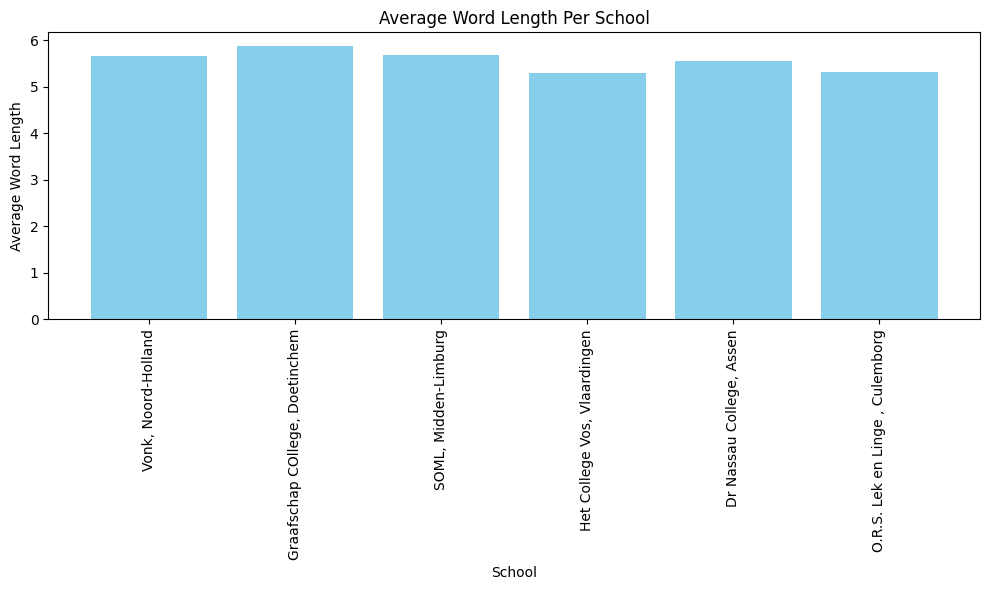

In [12]:
# Gemiddelde Woord lengte per school
plt.figure(figsize=(10, 6))
plt.bar(df_stats['School'], df_stats['Average Word Length'], color='skyblue')
plt.xlabel('School')
plt.ylabel('Average Word Length')
plt.title('Average Word Length Per School')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<a name='4.4'></a>
<h3>&sect;4.4: de Vocabulaire Diversiteit</h3>

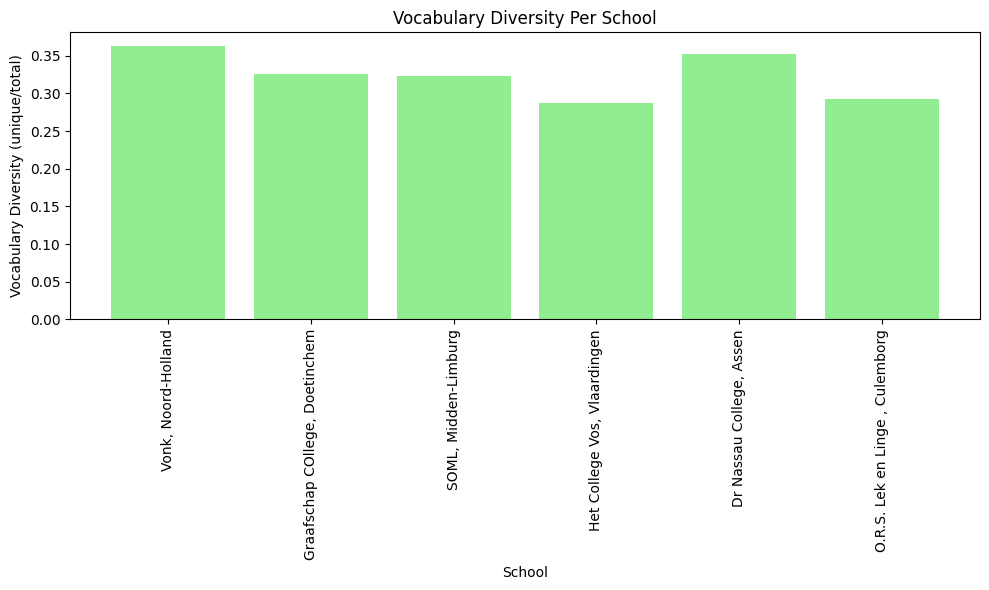

In [13]:
# de Vocabulaire Diversiteit
plt.figure(figsize=(10, 6))
plt.bar(df_stats['School'], df_stats['Vocabulary Diversity'], color='lightgreen')
plt.xlabel('School')
plt.ylabel('Vocabulary Diversity (unique/total)')
plt.title('Vocabulary Diversity Per School')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<a name='4.5'></a>
<h3>&sect;4.5: Totaal aantal woorden visualiseren</h3>

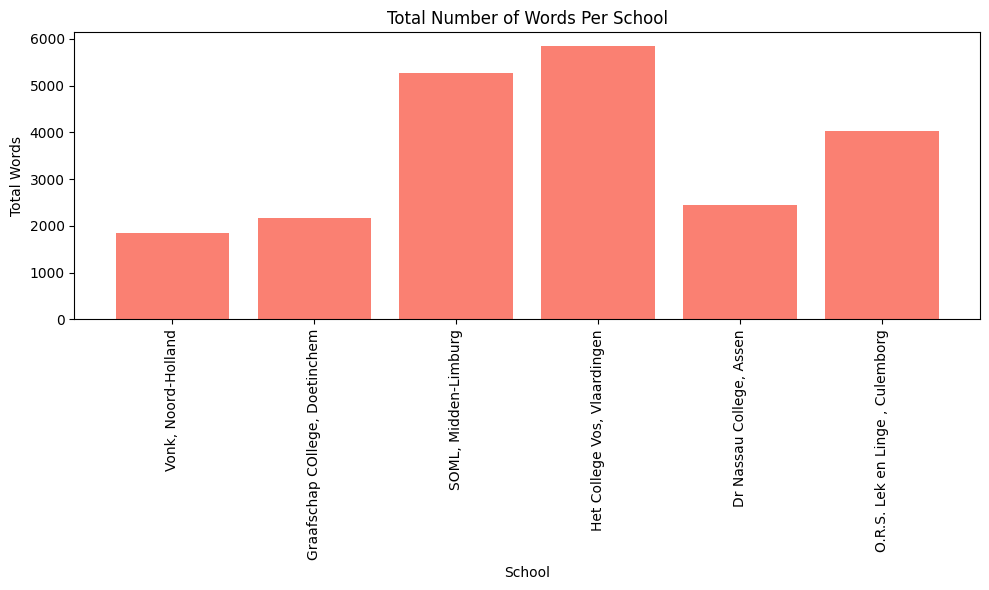

In [14]:
# Totaal aantal woorden visualiseren
plt.figure(figsize=(10, 6))
plt.bar(df_stats['School'], df_stats['Total Words'], color='salmon')
plt.xlabel('School')
plt.ylabel('Total Words')
plt.title('Total Number of Words Per School')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In het originele document bevatte de school SG De Rietlanden, Lelystad veel data, maar dat is tijdens het inlezen weg gevallen. Dit komt, omdat de tekst bijna volledig werd ingelezen als unicodes waar geen nuttige informatie uit gehaald kan worden. Het is belangrijk om uit te zoeken of ons model het bestand wel volledig kan inlezen, omdat het anders beter is om zulke bestanden te verwijderen. We willen geen bestanden meegeven die alleen maar voor ruis gaan zorgen tijdens het trainen of gebruiken van het model.

<a name='4.6'></a>
<h3>&sect;4.6: Meest voorkomende woorden per school</h3>

In [15]:
common_words = {}
for school, text in cleaned_school_data.items():
    tokens = word_tokenize(text)
    word_freq = Counter(tokens)
    common_words[school] = word_freq.most_common(5)

for school, words in common_words.items():
    print(f"School: {school}\nCommon Words: {words}\n")

School: Vonk, Noord-Holland
Common Words: [('.', 76), ('van', 62), ('je', 62), ('een', 57), ('de', 55)]

School: Graafschap COllege, Doetinchem
Common Words: [('de', 125), ('.', 84), ('het', 65), ('van', 60), (',', 54)]

School: SOML, Midden-Limburg
Common Words: [('de', 230), ('.', 148), ('van', 145), (',', 133), ('en', 122)]

School: Het College Vos, Vlaardingen
Common Words: [('de', 325), ('.', 202), ('(', 181), ('van', 180), (')', 178)]

School: Dr Nassau College, Assen
Common Words: [('de', 104), (',', 91), ('van', 88), ('.', 75), ('het', 66)]

School: O.R.S. Lek en Linge , Culemborg
Common Words: [('de', 231), ('van', 154), ('.', 144), ('het', 106), ('een', 103)]



[Back to the top](#start)
<a name='5.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H5: Verbeteren van de data</strong></h2>
</div>

<a name='5.1'></a>
<h3>&sect;5.1: Inladen van Nederlandse stopwoorden</h3>

In [16]:
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = file.read().splitlines()
    return set(stopwords)

stop_words = load_stopwords('dutch_stopwords.txt')

<a name='5.2'></a>
<h3>&sect;5.2: Nederlandse stopwoorden verwijderen</h3>

In [17]:
def remove_stopwords(text, stopwords):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stopwords and word.isalnum()]
    return ' '.join(filtered_words)

cleaned_school_data_no_stopwords = {school: remove_stopwords(text, stop_words) for school, text in cleaned_school_data.items()}

<a name='5.3'></a>
<h3>&sect;5.3: Weergeven van meest voorkomende woorden na verwijdering van stopwoorden</h3>

In [18]:
def get_most_common_words(text, num_words=10):
    tokens = word_tokenize(text)
    word_freq = Counter(tokens)
    return word_freq.most_common(num_words)

common_words_no_stopwords = {school: get_most_common_words(text) for school, text in cleaned_school_data_no_stopwords.items()}

In [19]:
common_words_no_stopwords

{'Vonk, Noord-Holland': [('Vonk', 21),
  ('opleiding', 17),
  ('volgen', 13),
  ('betalen', 12),
  ('kosten', 11),
  ('cursusgeld', 8),
  ('1', 7),
  ('jaar', 7),
  ('factuur', 7),
  ('leermiddelen', 7)],
 'Graafschap COllege, Doetinchem': [('leermiddelen', 29),
  ('student', 17),
  ('studenten', 16),
  ('school', 15),
  ('leermiddelenbeleid', 14),
  ('jaar', 12),
  ('Graafschap', 12),
  ('O', 12),
  ('I', 12),
  ('College', 11)],
 'SOML, Midden-Limburg': [('leermiddelen', 56),
  ('leerlingen', 25),
  ('SOML', 19),
  ('leermiddelenbeleid', 17),
  ('school', 17),
  ('onderwijs', 17),
  ('scholen', 16),
  ('aanbesteding', 15),
  ('keuze', 15),
  ('doelen', 13)],
 'Het College Vos, Vlaardingen': [('leerlingen', 41),
  ('leermiddelen', 39),
  ('docenten', 22),
  ('digitale', 21),
  ('materiaal', 21),
  ('school', 19),
  ('gebruik', 18),
  ('werkboeken', 16),
  ('jaar', 14),
  ('gesprek', 13)],
 'Dr Nassau College, Assen': [('leermiddelen', 26),
  ('gebruik', 15),
  ('school', 13),
  ('Nass

Er komen veel woorden naar boven die op elkaar lijken, denk bijvoorbeeld aan leerling en leerlingen. Het is handig om een vorm van stemming of lemmatization toe te passen, omdat zulk soort woorden de zelfde betekenis hebben.

Daarnaast zien we ook veel enkele letters terug in de meest voorkomende woorden. Deze hebben geen betekenis en willen we ook verwijderen.

Als laatste komen er veel enkele cijfers terug die op zich zelf geen betekenis hebben. Belangrijke cijfers als bedragen willen we wil behouden, maar deze worden aangegeven met een euro teken. Daarom willen we de cijfers uit de teksten halen die alleen staan.

<a name='5.4'></a>
<h3>&sect;5.4: Stemmen van de woorden</h3>

In [20]:
stemmer = SnowballStemmer("dutch")

def stem_words(words, stemmer):
    return [stemmer.stem(word) for word in words]

<a name='5.5'></a>
<h3>&sect;5.5: Laatste ronde tekst opschonen</h3>

In [21]:
def process_text(text, stopwords, stemmer):
    words = word_tokenize(text)
    # Filter woorden: verwijder stopwoorden, alfanumerieke woorden, en woorden met één letter, en losse cijfers
    filtered_words = [word for word in words if word.lower() not in stopwords and len(word) > 1 and word.isalnum() and not word.isdigit()]
    # Pas stemming toe
    stemmed_words = stem_words(filtered_words, stemmer)
    return ' '.join(stemmed_words)

processed_school_data = {school: process_text(text, stop_words, stemmer) for school, text in cleaned_school_data.items()}

<a name='5.6'></a>
<h3>&sect;5.6: Meest voorkomende woorden per school na laatste opschoning</h3>

In [22]:
common_words_processed = {school: get_most_common_words(text) for school, text in processed_school_data.items()}

for school, words in common_words_processed.items():
    print(f"School: {school}\nTop Words: {words}\n")

School: Vonk, Noord-Holland
Top Words: [('vonk', 22), ('opleid', 21), ('betal', 18), ('volg', 13), ('kost', 11), ('student', 10), ('cursusgeld', 9), ('lesgeld', 8), ('jar', 7), ('factur', 7)]

School: Graafschap COllege, Doetinchem
Top Words: [('student', 38), ('leermiddel', 33), ('schol', 16), ('leermiddelenlijst', 16), ('leermiddelenbeleid', 15), ('jar', 13), ('gebruikt', 12), ('graafschap', 12), ('colleg', 12), ('team', 12)]

School: SOML, Midden-Limburg
Top Words: [('leermiddel', 61), ('schol', 37), ('leerling', 35), ('onderwijs', 23), ('soml', 20), ('aanbested', 18), ('doel', 18), ('leermiddelenbeleid', 17), ('lerar', 16), ('ler', 15)]

School: Het College Vos, Vlaardingen
Top Words: [('leerling', 51), ('leermiddel', 41), ('digital', 28), ('docent', 27), ('gesprek', 25), ('werkboek', 25), ('gebruik', 22), ('schol', 21), ('materiaal', 21), ('jar', 20)]

School: Dr Nassau College, Assen
Top Words: [('leermiddel', 28), ('leerling', 17), ('digital', 16), ('onderwijs', 15), ('gebruik',